# NFL Team Salary Scraping


### Background and problem statement
First a little background, I am NY Jets fan.  I grew up in New Jersey and the first SuperBowl I remember is Phil Simms and Otis Anderson methodically moving the ball down the field. 

## Write and Read from a file

Instead of continuing to get from the web page I put everything into a file and then worked from there.  

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
base_url = "http://www.spotrac.com/nfl/new-york-jets/cap/"

def get_page(base_url):
    page = urlopen(base_url)
    soup = BeautifulSoup(page)
    file = open("sample_page.txt", 'w')
    file.write(str(soup))
    file.close()

In [3]:
with open("sample_page.txt", 'rb') as file:
    for line in file:
        line = line.strip()

## Parse the HTML
Import the BeautifulSoup library and use the find method to get the datatable.
It is important to note here, that I opened the sample_page with read binary flags "rb".  Leaving off the binary was causing the parser to puke 6 ways to Sunday.  

In [4]:
from bs4 import BeautifulSoup
page = open("sample_page.txt", 'rb')
soup = BeautifulSoup(page, "html.parser")
table = str(soup.find("table","datatable"))



## Render the table
This is an exact replica of the HTML table on the page

In [5]:
from IPython.core.display import HTML
HTML(table)


Active Players (53),Pos.,Base Salary,Signing Bonus,Roster Bonus,Option Bonus,Workout Bonus,Restruc. Bonus,Misc.,Dead Cap,Cap Hit,Cap %
Wilkerson Muhammad Wilkerson,DE,"$14,750,000","$3,000,000",-,-,"$250,000",-,-,"($27,000,000)","$18,000,000",12.17
Skrine Buster Skrine,CB,"$6,000,000","$1,250,000",-,-,-,"$1,250,000",-,"($11,000,000)","$8,500,000",5.75
Winters Brian Winters,G,"$1,000,000",-,"$7,000,000",-,-,-,-,"($22,000,000)","$8,000,000",5.41
Carpenter James Carpenter,G,"$4,450,000","$875,000","$250,000",-,-,"$1,230,000",-,"($8,660,000)","$6,805,000",4.60
McCown Josh McCown,QB,"$3,000,000","$3,000,000",-,-,-,-,"$500,000","($6,000,000)","$6,500,000",4.39
Williams Leonard Williams,DE,"$615,000","$2,952,430","$1,513,716",-,-,-,-,"($11,009,149)","$5,081,146",3.44
Forte Matt Forte,RB,"$4,000,000","$1,000,000",-,-,-,-,-,"($6,000,000)","$5,000,000",3.38
Beachum Kelvin Beachum,LT,"$1,500,000","$1,500,000","$2,000,000",-,-,-,-,"($12,000,000)","$5,000,000",3.38
Claiborne Morris Claiborne,CB,"$2,500,000","$2,000,000","$218,750",-,-,-,-,"($4,500,000)","$4,718,750",3.19
Powell Bilal Powell,RB,"$3,750,000","$883,333",-,-,-,-,-,"($5,516,668)","$4,633,333",3.13


In [6]:
rows = [row for row in soup.find("table", "datatable").find_all("tr")]
players = []
for row in rows:
    if row.get_text("tr") is not None:
        players.append(row)

len(players)        

54

In [74]:
columns_headers = [col.get_text() for col in players[0].find_all("th") if col.get_text()]
columns_headers

['Active Players  (53)',
 'Pos.',
 'Base Salary',
 'Signing Bonus',
 'Roster Bonus',
 'Option Bonus',
 'Workout Bonus',
 'Restruc. Bonus',
 'Misc.',
 'Dead Cap',
 'Cap Hit',
 'Cap %']

## List of player names
Get the player names from the td tags that are of class="player"

I sliced this to get only the first 110 records because the rest have the same labels as above.  This should be a list of 53 to reflect the 53 man roster.  Some records are last name only like "Wilkerson" and then "Muhammad Wilkerson" so there are duplicates.





In [12]:
td_tags = soup.find_all("td", {"class":"player"})[:110]
player_names = []

for row in td_tags:
    player_names.append(row.get_text())


final_player_names = []
for names in player_names:
        names = names.strip().split("\n")
        if len(names[1:]) > 0:
            final_player_names.append(names[1:])
            
final_player_names


[['Muhammad Wilkerson'],
 ['Buster Skrine'],
 ['Brian Winters'],
 ['James Carpenter'],
 ['Josh McCown'],
 ['Leonard Williams'],
 ['Matt Forte'],
 ['Kelvin Beachum'],
 ['Morris Claiborne'],
 ['Bilal Powell'],
 ['Benjamin Ijalana'],
 ['Jamal Adams'],
 ['Steve McLendon'],
 ['Wesley Johnson'],
 ['Marcus Williams'],
 ['Darron Lee'],
 ['Demario Davis'],
 ['Jermaine Kearse'],
 ['Josh Martin'],
 ['Marcus Maye'],
 ['Christian Hackenberg'],
 ['Austin Seferian-Jenkins'],
 ['Mike Pennel'],
 ['Chandler Catanzaro'],
 ['Jonotthan Harrison'],
 ['Kony Ealy'],
 ['Bruce Carter'],
 ['Jeremy Kerley'],
 ['Julian Stanford'],
 ['Dakota Dozier'],
 ['Bryce Petty'],
 ['Jordan Jenkins'],
 ['Terrence Brooks'],
 ['David Bass'],
 ['Juston Burris'],
 ['ArDarius Stewart'],
 ['Rontez Miles'],
 ['Brent Qvale'],
 ['Darryl Roberts'],
 ['Neal Sterling'],
 ['Will Tye'],
 ['Brandon Shell'],
 ['Chad Hansen'],
 ['Lac Edwards'],
 ['Charone Peake'],
 ['Robby Anderson'],
 ['Eric Tomlinson'],
 ['Jordan Leggett'],
 ['Dylan Donahue'

## Player Position and Salary
Pick out the position of each player and the Cap Hit

The resulting data type of get_text() is a string.  player_cap_hit will need to be converted to an int once loaded into a dataframe.

There are 53 rows with salaries, and 110 positions.  The number of positions makes sense and matches to what and NFL active roster should be, but why are there 110 salaries?  



In [8]:
player_cap_hit = []
cap_info_rows = soup.find_all("td", {"class":" right result "})
for row in cap_info_rows:
    player_cap_hit.append(row.get_text())

len(player_cap_hit)


53

In [9]:
player_position = []
position_rows = soup.find_all("td", {"class": " center small"})
for row in position_rows:
    player_position.append(row.get_text())
    #print(player_position)
len(player_position)

110

In [15]:
import pandas as pd

df = pd.DataFrame({"position": player_position, "player names": player_names})

In [16]:
df.head()

,player names,position
0,Wilkerson\nMuhammad Wilkerson,DE
1,Skrine\nBuster Skrine,CB
2,Winters\nBrian Winters,G
3,Carpenter\nJames Carpenter,G
4,McCown\nJosh McCown,QB


In [17]:
df1 = pd.DataFrame({"Names": final_player_names,"Cap Hit": player_cap_hit})

In [71]:
df1.head()

,Cap Hit,Names
0,"$18,000,000",[Muhammad Wilkerson]
1,"$8,500,000",[Buster Skrine]
2,"$8,000,000",[Brian Winters]
3,"$6,805,000",[James Carpenter]
4,"$6,500,000",[Josh McCown]


In [18]:
df1.dtypes

Cap Hit    object
Names      object
dtype: object

In [19]:
player_data = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]


In [48]:
df2 = pd.DataFrame(player_data, columns=None)
df2 = df2.drop(df2.index[[0]])
df2[0] = final_player_names


In [75]:
df2.columns = [columns_headers]

In [76]:
df2.head()

,Active Players (53),Pos.,Base Salary,Signing Bonus,Roster Bonus,Option Bonus,Workout Bonus,Restruc. Bonus,Misc.,Dead Cap,Cap Hit,Cap %
1,[Muhammad Wilkerson],DE,"$14,750,000","$3,000,000",-,-,"$250,000",-,-,"($27,000,000)",18000000.0,12.17
2,[Buster Skrine],CB,"$6,000,000","$1,250,000",-,-,-,"$1,250,000",-,"($11,000,000)",8500000.0,5.75
3,[Brian Winters],G,"$1,000,000",-,"$7,000,000",-,-,-,-,"($22,000,000)",8000000.0,5.41
4,[James Carpenter],G,"$4,450,000","$875,000","$250,000",-,-,"$1,230,000",-,"($8,660,000)",6805000.0,4.60
5,[Josh McCown],QB,"$3,000,000","$3,000,000",-,-,-,-,"$500,000","($6,000,000)",6500000.0,4.39


In [77]:
df2['Cap Hit'] = (df2['Cap Hit'].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True ).astype(float))

In [78]:
df2['Cap Hit'].sum()

121989564.0

In [110]:
barchart_columns = ['Active Players  (53)', 'Cap Hit']
barchart = df2[barchart_columns].plot(kind='bar', figsize=(12, 9))
barchart.set_xlabel("final_player_names")

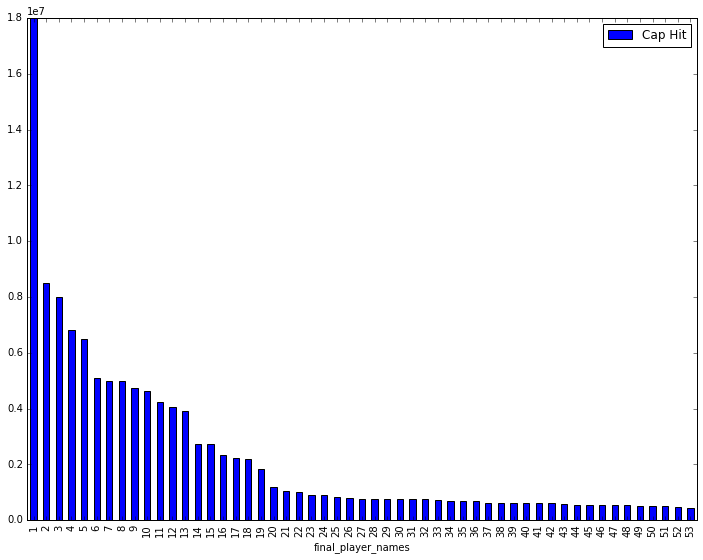

In [111]:
import matplotlib.pyplot as plt
plt.show()